# **Supervised Learning - Linear Regression**

### Load the dataset

In [1]:
import pandas as pd
data = pd.read_csv("student_scores.csv")
#data['timestamp'] = pd.to_datetime(data['timestamps'])
data.head(10)

,name,hours,score,gender,grades,class
0,Aarav,8,76,M,A,9A
1,Riya,5,62,F,B,9B
2,Kabir,10,88,M,A,10A
3,Sana,4,55,F,C,9A
4,Vivaan,7,72,M,B,10B
5,Ishita,6,64,F,B,9C
6,Rohan,3,48,M,D,9B
7,Meera,9,90,F,A,11A
8,Aditya,2,38,M,F,9C
9,Kavya,11,93,F,A,12A


### Inspect the dataset

In [2]:
# Inspect columns and basic info
print('Columns:', data.columns.tolist())

#1. Dataset Basic Info
print('\nDataset Info:')
print(data.info())


#2. Completeness: Checks for missing values:
#Checks if any column has missing/null values.
print('\nDataset Completeness:')
print(data.isnull().sum())


#3. Dataset Consistency: All numeric columns should be numeric.
print('\nDataset Consistency:')
print(data.dtypes)   # Check datatype consistency

Columns: ['name', 'hours', 'score', 'gender', 'grades', 'class']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    92 non-null     object
 1   hours   92 non-null     int64 
 2   score   92 non-null     int64 
 3   gender  92 non-null     object
 4   grades  92 non-null     object
 5   class   92 non-null     object
dtypes: int64(2), object(4)
memory usage: 4.4+ KB
None

Dataset Completeness:
name      0
hours     0
score     0
gender    0
grades    0
class     0
dtype: int64

Dataset Consistency:
name      object
hours      int64
score      int64
gender    object
grades    object
class     object
dtype: object


In [3]:
#4. Accuracy: Values realistic or outlier
print('\nDataset Describe:')
data.describe()    #Summary stats
#data['hours'].plot(kind = 'box')

#5. TIME-KEEPING Is the data up-to-date ?
print('\nDataset Time-Keeping:')
print('\nNo timestamps')

#6. BIAS check is data skewed toward 1 user group ?
print('\Dataset Bias')
print(data['gender'].value_counts(normalize = True))
print(data['grades'].value_counts(normalize = True))
data['class'].value_counts(normalize = True)


Dataset Describe:

Dataset Time-Keeping:

No timestamps
\Dataset Bias
gender
F    0.51087
M    0.48913
Name: proportion, dtype: float64
grades
B    0.358696
A    0.326087
C    0.195652
D    0.086957
F    0.032609
Name: proportion, dtype: float64


class
9A     0.141304
10A    0.119565
9B     0.108696
9C     0.108696
10B    0.086957
11A    0.086957
10C    0.076087
12A    0.065217
12B    0.065217
11B    0.054348
12C    0.054348
11C    0.032609
Name: proportion, dtype: float64

## 33.4.2  Dataset Specification Sheet

| **Field**           | **Details** |
|---------------------|-------------|
| **Dataset Name**    | `student_scores.csv` (demo dataset) |
| **Description**     | Contains student study behavior and academic performance data used to demonstrate Data Quality checks including Completeness, Consistency, Accuracy, Bias analysis, and basic feature engineering. |
| **Features**        | `name`, `hours`, `score`, `gender`, `grades`, `class` |
| **Target Variable** | *None* (Exploratory dataset only) |
| **Number of Rows**  | 92 |
| **Null Handling**   | No missing values detected across any feature |
| **Transformations** | Label encoding applied to `class` → `class_encoded`; datatype validation performed; value distribution and proportion analysis conducted for `gender`, `grades`, and `class` |
| **Owner**           | Vedashree |
| **Last Updated**    | 2026-02-08 |

### Separate Features and Labels

In [4]:
categorical = data.select_dtypes(include = 'object').columns
numerical = data.select_dtypes(exclude = 'object').columns

print("Categorical Features: ", list(categorical))
print("Numerical Features: ", list(numerical))

#Encode class column 
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#data["class_encoded"] = le.fit_transform(data["grades"})

X = data[["hours"]]
y = data["score"]

Categorical Features:  ['name', 'gender', 'grades', 'class']
Numerical Features:  ['hours', 'score']


## As the feature 'hours' is already in numerical form , there is no need of encoding it. It can be directly used for training.

### Data Distribution

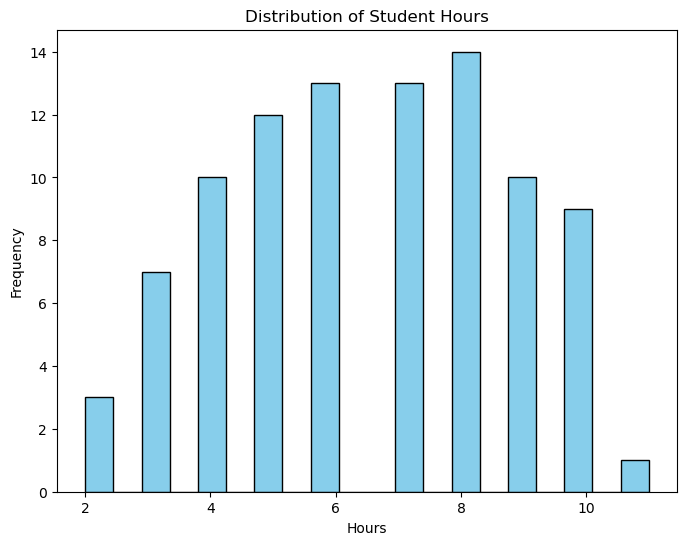

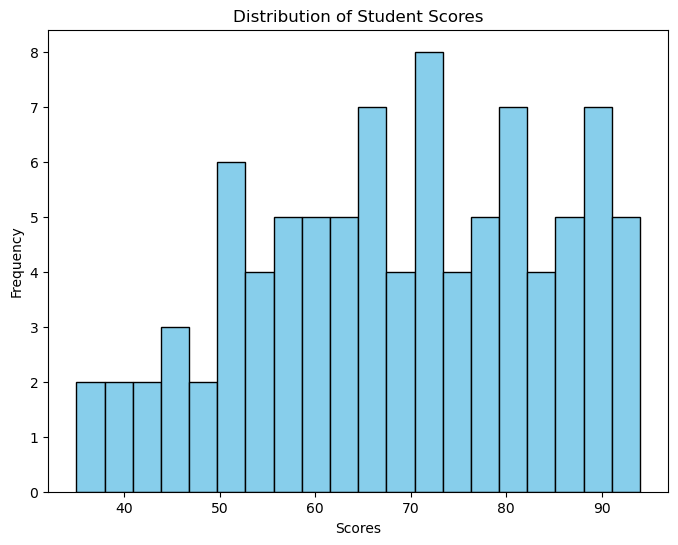

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.hist(X, bins = 20, color = 'skyblue', edgecolor = 'black')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Distribution of Student Hours')
plt.show()

plt.figure(figsize = (8,6))
plt.hist(y, bins= 20 , color = 'skyblue', edgecolor = 'black')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Student Scores')
plt.show()

### Split the Data

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2,
    random_state = 42
    #stratify = y
)

### Train the Model 

In [7]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train)

print("Model Coefficient (Slope): ",model.coef_[0])
print("Model Intercept: ",model.intercept_)
# The coefficient indicates how much the score increases for every for every additional hour of study.

Model Coefficient (Slope):  6.804392044598464
Model Intercept:  24.617635980111494


### Make Predictions 

In [8]:
y_pred = model.predict(X_test)
pred_data = {'Y_prediction' : y_pred.round(2), 
             'Y_test' : y_test.reset_index(drop = True)}

prediction_table = pd.DataFrame(pred_data)
prediction_table

,Y_prediction,Y_test
0,79.05,81
1,85.86,84
2,45.03,40
3,38.23,36
4,79.05,76
5,79.05,82
6,72.25,75
7,85.86,85
8,58.64,60
9,45.03,43


### Plot the Line of Regression 

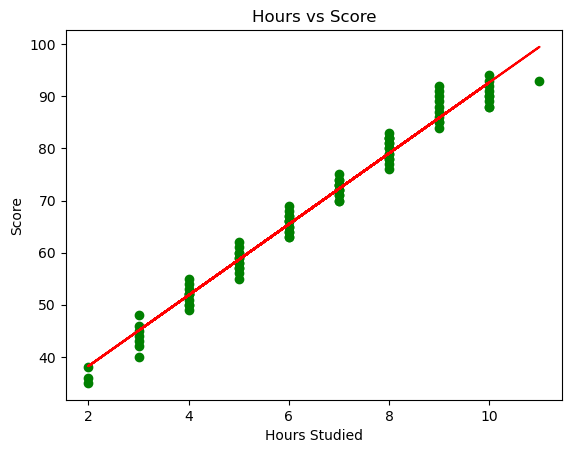

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color = 'green')
plt.plot(X, model.predict(X), color = 'red')
plt.title("Hours vs Score")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()

### Linear Regression Assumptions

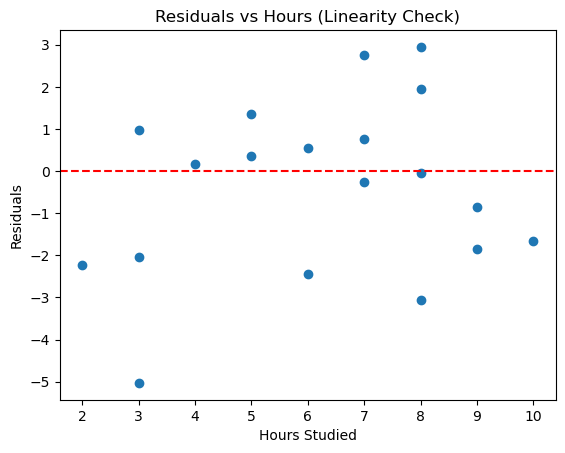

In [10]:
# Residuals
residuals = y_test - y_pred 

#1. Linearity check (Residuals vs X)
plt.scatter(X_test, residuals)
plt.axhline(y = 0, color = 'red' , linestyle = '--')
plt.xlabel("Hours Studied")
plt.ylabel("Residuals")
plt.title("Residuals vs Hours (Linearity Check)")
plt.show()

### Evaluate the Model 

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print(f"MSE : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²  : {r2:.2f}")

#RMSE represents the average error in score prediction.
#For example, an RSME of 6 means predictions are off by ~6 marks on average.

MSE : 4.24
RMSE : 2.06
R²  : 0.98


### Actual vs Predicted Plot 

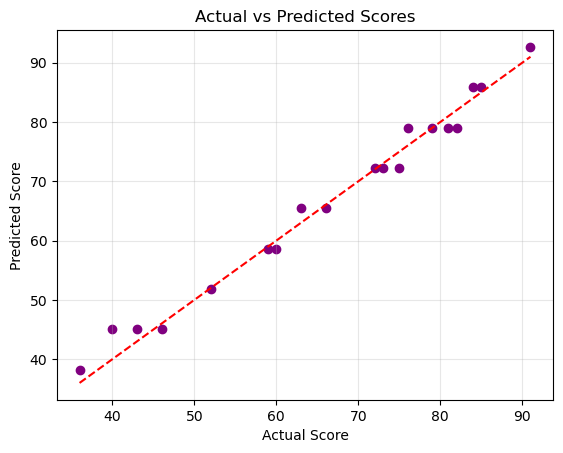

In [12]:
plt.scatter(y_test, y_pred, color = 'purple')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color = 'red', linestyle = '--')

plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Scores")
plt.grid(alpha = 0.3)
plt.show()

##### Points close to diagonal -> good predictions
##### Large deviation -> prediction error

### Baseline Comparison 

In [13]:
# Baseline prediction: mean of training scores
baseline_pred = [y_train.mean()]*len(y_test)

baseline_mse = mean_squared_error(y_test, baseline_pred)
baseline_r2 = r2_score(y_test, baseline_pred)

print("Baseline MSE :", round(baseline_mse, 2))
print("Baseline R² :", round(baseline_r2, 3))

Baseline MSE : 272.91
Baseline R² : -0.034


## Activity

In [14]:
# Load the dataset
data = {
    "Hours": [1, 2, 3, 4, 5, 6, 7, 8],
    "Score": [35, 42, 51, 60, 68, 77, 85, 90]
}

df = pd.DataFrame(data)
print("Dataset Loaded Successfully! \n")
df

Dataset Loaded Successfully! 



,Hours,Score
0,1,35
1,2,42
2,3,51
3,4,60
4,5,68
5,6,77
6,7,85
7,8,90


In [15]:
# Separate X and y 
X = df[["Hours"]] # Feature (independent variable)
y = df["Score"] # Target (dependent variable)

print("Feature Sample : \n", X.head())
print("Target Sample : \n", y.head())

Feature Sample : 
    Hours
0      1
1      2
2      3
3      4
4      5
Target Sample : 
 0    35
1    42
2    51
3    60
4    68
Name: Score, dtype: int64


In [16]:
from sklearn.linear_model import LinearRegression 
# Create and train model 
model = LinearRegression()
model.fit(X,y)
print("Model Trained Successfully!")
print("Slope (Coefficient): ", model.coef_[0])
print("Intercept: ",model.intercept_)

Model Trained Successfully!
Slope (Coefficient):  8.166666666666666
Intercept:  26.75


In [17]:
# Predict using trained model 
y_pred = model.predict(X)
# Display comparison 
df["Predicted Score"] = y_pred.round(2)
print("\n Actual vd Predicted Scores : \n")
df


 Actual vd Predicted Scores : 



,Hours,Score,Predicted Score
0,1,35,34.92
1,2,42,43.08
2,3,51,51.25
3,4,60,59.42
4,5,68,67.58
5,6,77,75.75
6,7,85,83.92
7,8,90,92.08


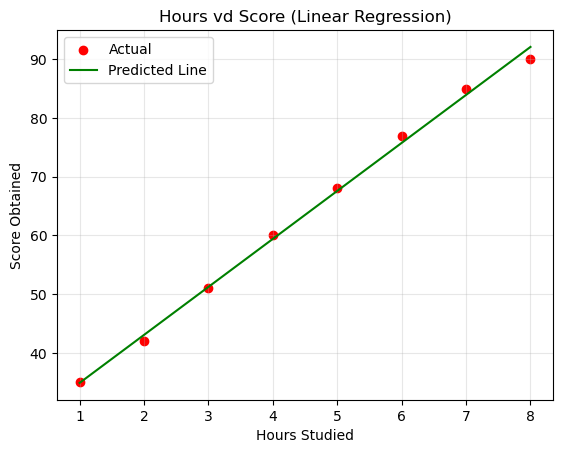

In [22]:
# Plot Actual vs Predicted
plt.scatter(X,y, color = 'red', label = 'Actual')
plt.plot(X,y_pred, color = 'green', label = 'Predicted Line')
plt.title("Hours vd Score (Linear Regression)")
plt.xlabel("Hours Studied")
plt.ylabel("Score Obtained")
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

In [23]:
# Evaluate the model 
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y,y_pred)
r2 = r2_score(y, y_pred)
print("\nModel Evaluation: ")
print("Mean Squared Error (MSE): ", round(mse, 3))
print("R² Score: ",round(r2, 3))


Model Evaluation: 
Mean Squared Error (MSE):  1.104
R² Score:  0.997


### User Input 

In [24]:
new_input = pd.DataFrame([[1]], columns = ["Hours"])
print("Prediction: ",model.predict(new_input))

Prediction:  [34.91666667]
